<a href="https://colab.research.google.com/github/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/blob/main/Blessing_Mvana_Nhlozi_Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Climate Change Belief Analysis

---
---
<a id="cont"></a>

## Table of Contents
---
---

<a href=#one>01. Team Meambers</a>

<a href=#two>02. Abstract</a>

<a href=#three>03. Introduction</a>

<a href=#four>04. Importing Packages</a>

<a href=#five>05. Loading Data</a>

<a href=#six>06. Data Engineering & Exploratory Data Analysis (EDA)</a>

<a href=#seven>07. Model Training</a>

<a href=#eight>08. Model's Predictive Accuracy Assessment</a>


## Team Members

 - [Blessing Mvana Nhlozi](https://www.linkedin.com/in/blessingmvananhlozi/)
 - Rebecca Kekana
 - [Sello Tebogo Mafikeng](https://www.linkedin.com/in/sello-sydney-mafikeng-46a664110/)
 - [Anga Mandiyata](https://www.linkedin.com/in/anga-mndiyata-a330231b4/)
 - [Mpilenhle Hlatshwayo](https://www.linkedin.com/in/mpilenhle-hlatshwayo-70544b169/)

## Abstract

Many businesses are based on reducing one's carbon footprint or environmental impact. They provide ecologically friendly and sustainable products and services that are consistent with their principles and goals. They want to know how people think about climate change and whether they believe it is a real issue.

In light of this, we developed a Machine Learning model that can classify whether or not a person believes in climate change based on their unique tweet data.

Providing a precise and robust solution to this assignment gives businesses access to a large pool of customer sentiment across numerous demographic and geographic groups, allowing them to gain new insights and better inform future marketing initiatives.

Using...

## Introduction

Forecasting the one's believe in climate change will help with potential customers. This would complement their market research efforts in determining how well their product or service will be received. and 

Given the recent explosion of Big Data, there is a growing demand for analyzing non traditional data sourcesand with world's innovation to AI/4IR we thought it's best use machine learning algoriths for this project since its cheap and quick rather than reading each tweet which will require a lot of humans to part take in it.

This will give businesses access to a large pool of customer sentiment that spans numerous demographics and geographic areas, allowing them to gain new insights and better inform future marketing tactics.

### Problem Statement

The lack of clients and not knowing which who is our potential customer

### Aims & Objective

- The aim is to increase advertising efficiency.
- By analyzing prior tweet data and forecasting an individual's belief in climate change, a potential client could be converted. 
- employing machine learning to develop effective marketing tools.

### Literature Review

#### What is climate change

Long-term changes in temperature and weather patterns are referred to as climate change.
Although these changes are natural, human activities have been the primary driver of climate change since the 1800s, owing to the burning of fossil fuels (such as coal, oil, and gas), which produces heat-trapping gases. 

#### What is the difference between Climate Change and Global Warming

- Climate change refers to the gradual but significant changes in climate variables such as precipitation, temperature, and wind patterns throughout time. 
eg. The Number of Humid days per year, Number of rainy days per year

- Global warming is the subset of climate change which refers to an increase in global temperatures caused mostly by rising greenhouse gas concentrations in the atmosphere.
e.g Average Temperature changes

#### What are the long-term effects of climate change for each continent? 

- Long-term implications of climate change are expected to include diminished sea ice and increased permafrost thawing, increased heat waves and heavy precipitation, and decreased water resources in semi-arid regions, according to scientists. 
- 

#### What are the effects of Climate change

## Importing Library Packages

In [ ]:
!pip install comet_ml
from comet_ml import Experiment

import re
import csv
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Downloads
nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Libraries for Data Engineering
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Libraries for Building Models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Libraries for evaluating the Model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

     |████████████████████████████████| 305 kB 5.3 MB/s 
     |████████████████████████████████| 546 kB 43.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=5fe64acc5e3c05734bd1ad0c7617543d2be45ff6fe94911913002d8476f1356b
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.z

## Loading the Data

In [ ]:
sample = pd.read_csv('https://raw.githubusercontent.com/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/main/data/sample_submission.csv')
train = pd.read_csv('https://raw.githubusercontent.com/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/main/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/MafikengZ/NLP-Tweet-Sentiment-Ananlysis/main/data/test.csv')
pd.set_option('display.max_colwidth', None)

## Data Engineering & Exploratory Data Analysis (EDA)

### Data Preprocessing

In [ ]:
display(train)
display(test)

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732


,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…",895714
10542,"2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg",875167
10543,RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd,78329
10544,"RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585",867455


In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
None


In [ ]:
print('The train dataset has a shape of',train.shape,'and the test dataset has a shape of',test.shape)

The train dataset has a shape of (15819, 3) and the test dataset has a shape of (10546, 2)


In [ ]:
percent_duplicates = round((1-(train['message'].nunique()/len(train['message'])))*100,2)
print(percent_duplicates,'%','of the train datasset are repeated tweets')

10.05 % of the train datasset are repeated tweets


### Data Clean and Data Manipulation

Creating a function that will convert the sentiment from numbers to words. 

Therefore:

    Input: 
    df: original dataframe
        datatype: dataframe

| sentiment      | message | tweetid     |
| :---        |    :----:   |          ---: |
| 1  | PolySciMajor EPA ...| 625221   |
| 1  | It's not like we lack ..| 126103|

    
    Output:
    df: modified dataframe
        datatype: dataframe 


| sentiment      | message | tweetid     |
| :---        |    :----:   |          ---: |
| Pro| PolySciMajor EPA ...| 625221   |
| Pro| It's not like we lack ..| 126103|
        

In [ ]:
def convert(df):
    word_sentiment = []
    for i in df['sentiment'] :
        if i==1 :
            word_sentiment.append('Pro')
        elif i==0 :
            word_sentiment.append('Neutral')
        elif i==-1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')
    df['sentiment'] = word_sentiment
    return df

In [ ]:
train=convert(train)
train

,sentiment,message,tweetid
0,Pro,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,Pro,It's not like we lack evidence of anthropogenic global warming,126103
2,News,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
...,...,...,...
15814,Pro,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001
15815,News,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,Neutral,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248
15817,Anti,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



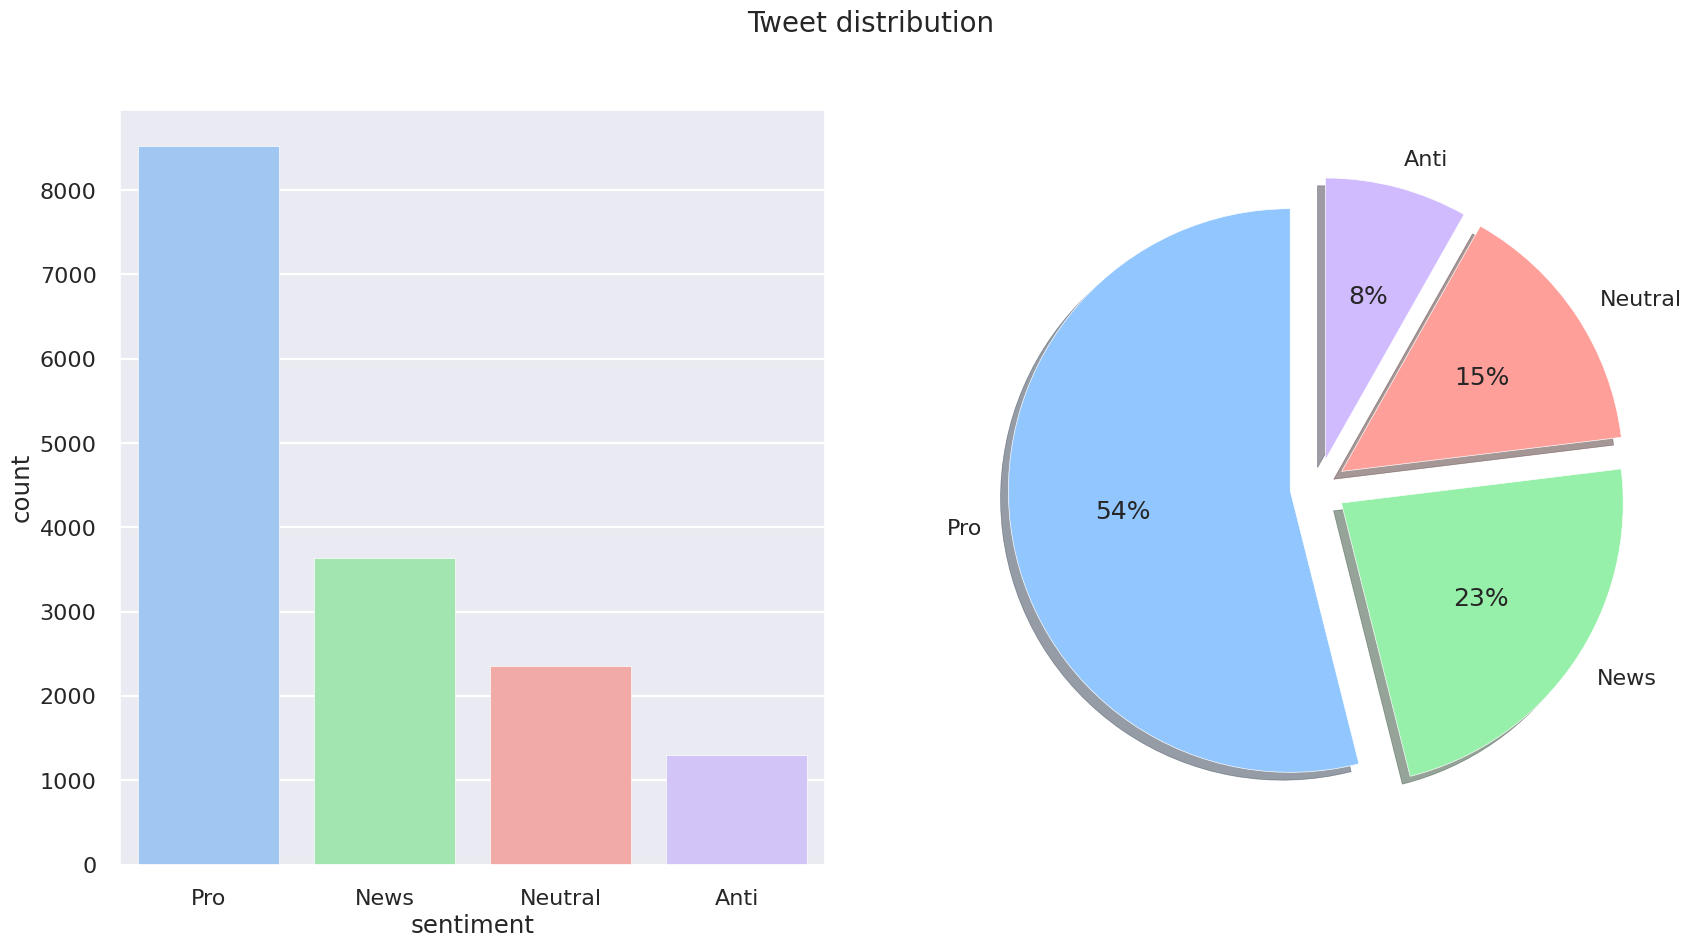

In [ ]:
# Display target distribution
style.use('seaborn-pastel')
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(20, 10),dpi=100)
sns.countplot(train['sentiment'], ax=axes[0])
labels=['Pro', 'News', 'Neutral', 'Anti'] 
axes[1].pie(train['sentiment'].value_counts(),labels=labels,autopct='%1.0f%%',shadow=True,startangle=90,explode = (0.1, 0.1, 0.1, 0.1))
fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

Creating a function that that takes in a tweet of a particular sentiment and produces a dataframe (which consist of `hastag topic` column and `hastag count` column) of that particular sentiment. Manipulating the data by creating new dataframes to will observe which hashtag topics are frequent and for which sentiment are they most frequent at.

Therefore:

    Input: 
    train['message'][train['sentiment'] == 'Pro']:
     Series([], Name: message, dtype: object)

| message |
|    :----:   |
| PolySciMajor EPA ...
| It's not like we lack ..|

    
    Output:
    ht_topic_count(train['message'][train['sentiment'] == 'Pro']):
     DataFrame([], Name: pro, dtype: object) 


| hastag topic | hastag count |
| :---        |          ---: |
| climate| xxx| 
| BeforeTheFlood| xxx|
        

In [ ]:
def ht_topic_count(tweet):    
    hashtags = []    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    dfhashtag = pd.DataFrame({'hashtag Topic': list(frequency.keys()),
                       'hastag count': list(frequency.values())})
    return dfhashtag.nlargest(15, columns='hastag count')

In [ ]:
pro = ht_topic_count(train['message'][train['sentiment'] == 'Pro'])
anti = ht_topic_count(train['message'][train['sentiment'] == 'Anti'])
neutral = ht_topic_count(train['message'][train['sentiment'] == 'Neutral'])
news = ht_topic_count(train['message'][train['sentiment'] == 'News'])

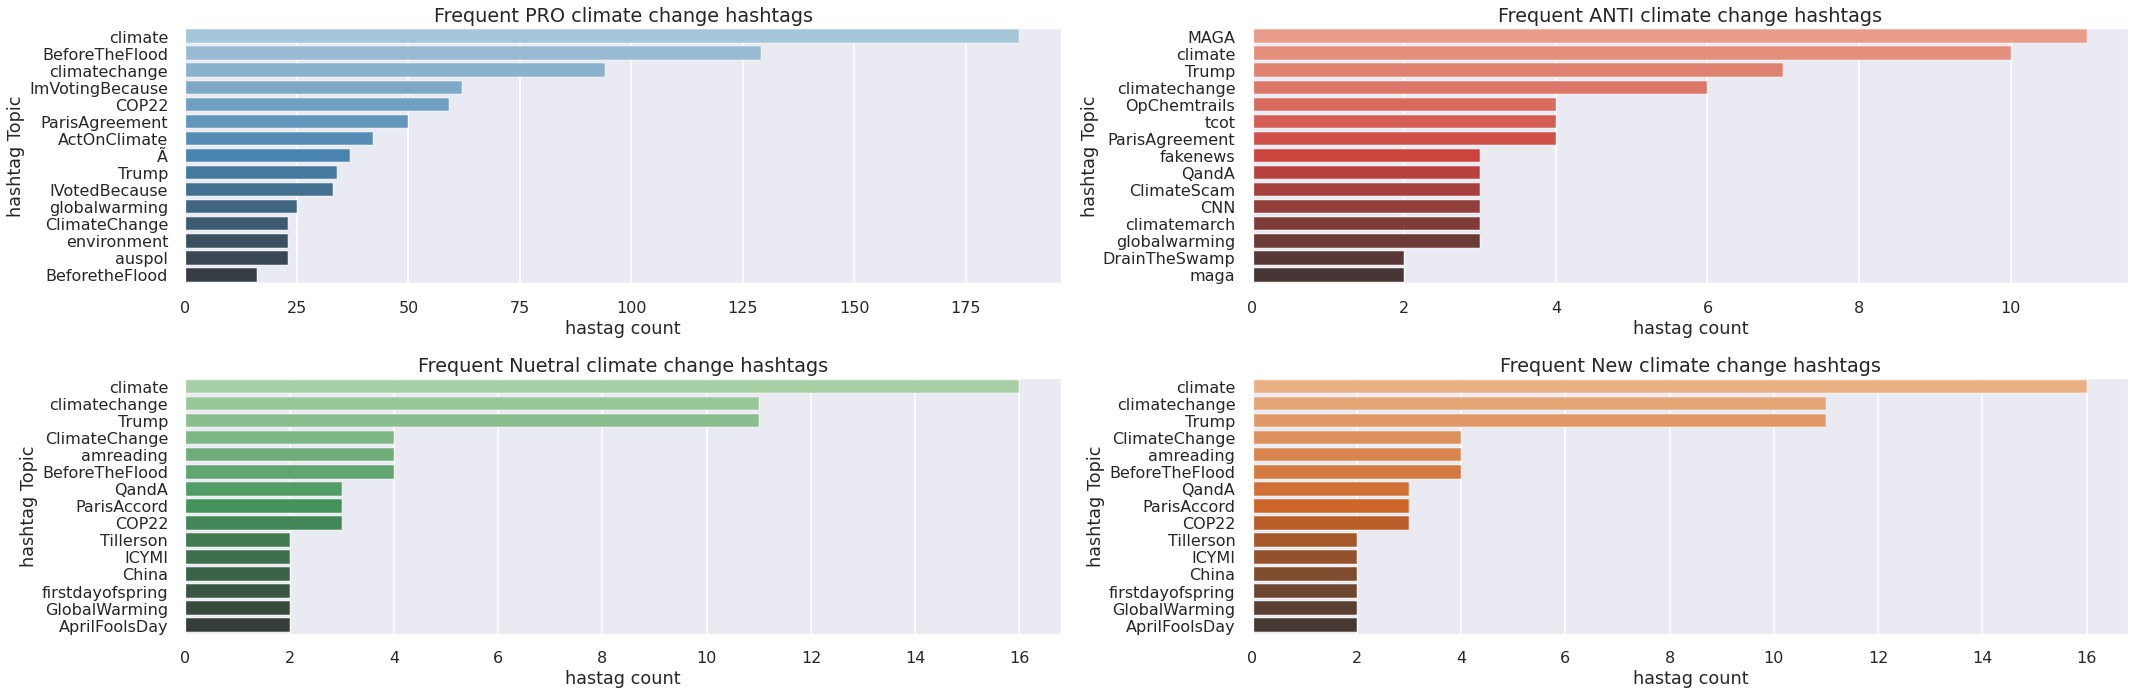

In [ ]:
# Plot the frequent hastags for pro and anti climate change classes
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.barplot(data=pro,y=pro['hashtag Topic'], x=pro['hastag count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,2)
sns.barplot(data=anti,y=anti['hashtag Topic'], x=anti['hastag count'], palette=("Reds_d"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,3)
sns.barplot(data=neutral,y=neutral['hashtag Topic'], x=neutral['hastag count'], palette=("Greens_d"))
plt.title('Frequent Nuetral climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,4)
sns.barplot(data=neutral,y=neutral['hashtag Topic'], x=neutral['hastag count'], palette=("Oranges_d"))
plt.title('Frequent New climate change hashtags')
plt.tight_layout()


Creating a function that will converting everything to lowercase letters and removes urls, mentions, hashtags, punctuation, digits, and any additional white space from tweets. 

**The function will:**

    Input:
    tweet: original tweet
           datatype: 'str'

| message |
|    :----:   |
| PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable|
| It's not like we lack evidence of anthropogenic global warming|
|RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…|


    Output:
    tweet: clean tweet
           datatype: 'str'


| sentiment      | message | tweetid     |
| :---        |    :----:   |          ---: |
| Pro| polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and ...| 625221   |
| Pro| its not like we lack evidence of anthropogenic global warming| 126103|
| News| rt researchers say we have three years to act on climate change before its too late| 698562|


In [ ]:
def cleantweet(tweet):    
    tweet=tweet.lower() # Converting tweewt to lowercase      
    tweet=re.sub('@[\w]*','',tweet) # Removing mentions    
    tweet=re.sub(r'https?:\/\/.*\/\w*', '', tweet) # Removing url's    
    tweet=re.sub(r'#\w*', '', tweet) # Removing hashtags    
    tweet=re.sub(r'\d+', '', tweet) # Removing numbers    
    tweet=re.sub(r"[,.;':@#?!\&/$]+\ *", ' ',tweet) # Removing punctuation    
    tweet=re.sub(r"U+FFFD ", ' ', tweet) # Removing the emoji diamond    
    tweet=re.sub(r'\s\s+', ' ', tweet) # Removing extra whitespace    
    tweet=tweet.lstrip(' ') # Remove space in front of tweet                    
    return tweet

In [ ]:
train['message']=train['message'].apply(cleantweet)
train

,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what via,625221
1,Pro,it s not like we lack evidence of anthropogenic global warming,126103
2,News,rt researchers say we have three years to act on climate change before it’s too late …,698562
3,Pro,wired was a pivotal year in the war on climate change,573736
4,Pro,rt it s and a racist sexist climate change denying bigot is leading in the polls,466954
...,...,...,...
15814,Pro,rt they took down the material on global warming lgbt rights and health care but now they re hocking melania s qvc https …,22001
15815,News,rt how climate change could be breaking up a -million-year-old relationship,17856
15816,Neutral,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in …,384248
15817,Anti,rt hey liberals the climate change crap is a hoax that ties to the climate is being changed byã¢â‚¬â¦,819732


Creating a function that will create new features in the train dataset. The columns will be `tweet length`, `tokenized`, `pos_tags`, `lemmatized`. The tweets are then [tokenized](https://www.google.com/search?client=firefox-b-d&q=tokenized) and each word is assigned a part of speech tag before being [lemmatized](https://www.google.com/search?client=firefox-b-d&q=lemmatized) using `WordNetLemmatizer()` built-in function.

**The function will:**
    
    Input:
    df: original dataframe
        datatype: dataframe 

| sentiment      | message | tweetid     |
| :---        |    :----:   |          ---: |
| Pro| polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and ...| 625221   |
| Pro| its not like we lack evidence of anthropogenic global warming| 126103|
| News| rt researchers say we have three years to act on climate change before its too late| 698562|

        
    Output:
    df: modified dataframe
        datatype: dataframe


|sentiment| message |tweet id| tweet length | tokenized|pos_tags|lemmatized|
| :---        |    :----:   |    :----:   |    :----:   |    :----:   |    :----:   |          ---: |
|Pro|polyscimajor epa chief ...|625221|xxx| [polyscimajor, epa, chief,...]| [(xxx,yyy), (xxx,yyy),...|polyscimajor epa chief...|
|Pro| It s not like we lack ..| 126103|xxx|[its, not, like, we,...]|[(xxx,yyy), (xxx,yyy),...|It's not like we lack ...|

In [ ]:
def lemma(df):    
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
            
        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

In [ ]:
train=lemma(train)
train

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what via,625221,102,"[polyscimajor, epa, chief, doesn, t, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]","[(polyscimajor, a), (epa, n), (chief, n), (doesn, n), (t, n), (think, v), (carbon, n), (dioxide, n), (is, v), (main, a), (cause, n), (of, n), (global, a), (warming, n), (and, n), (wait, v), (what, n), (via, n)]",polyscimajor epa chief doesn t think carbon dioxide be main cause of global warming and wait what via
1,Pro,it s not like we lack evidence of anthropogenic global warming,126103,62,"[it, s, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[(it, n), (s, v), (not, r), (like, n), (we, n), (lack, v), (evidence, n), (of, n), (anthropogenic, a), (global, a), (warming, n)]",it s not like we lack evidence of anthropogenic global warming
2,News,rt researchers say we have three years to act on climate change before it’s too late …,698562,86,"[rt, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’, s, too, late, …]","[(rt, n), (researchers, n), (say, v), (we, n), (have, v), (three, n), (years, n), (to, n), (act, v), (on, n), (climate, n), (change, n), (before, n), (it, n), (’, v), (s, r), (too, r), (late, a), (…, n)]",rt researcher say we have three year to act on climate change before it ’ s too late …
3,Pro,wired was a pivotal year in the war on climate change,573736,54,"[wired, was, a, pivotal, year, in, the, war, on, climate, change]","[(wired, v), (was, v), (a, n), (pivotal, a), (year, n), (in, n), (the, n), (war, n), (on, n), (climate, n), (change, n)]",wire be a pivotal year in the war on climate change
4,Pro,rt it s and a racist sexist climate change denying bigot is leading in the polls,466954,81,"[rt, it, s, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]","[(rt, v), (it, n), (s, n), (and, n), (a, n), (racist, n), (sexist, n), (climate, n), (change, n), (denying, v), (bigot, n), (is, v), (leading, v), (in, n), (the, n), (polls, n)]",rt it s and a racist sexist climate change deny bigot be lead in the poll
...,...,...,...,...,...,...,...
15814,Pro,rt they took down the material on global warming lgbt rights and health care but now they re hocking melania s qvc https …,22001,122,"[rt, they, took, down, the, material, on, global, warming, lgbt, rights, and, health, care, but, now, they, re, hocking, melania, s, qvc, https, …]","[(rt, n), (they, n), (took, v), (down, r), (the, n), (material, n), (on, n), (global, a), (warming, v), (lgbt, a), (rights, n), (and, n), (health, n), (care, n), (but, n), (now, r), (they, n), (re, v), (hocking, v), (melania, n), (s, n), (qvc, n), (https, n), (…, n)]",rt they take down the material on global warm lgbt right and health care but now they re hock melania s qvc http …
15815,News,rt how climate change could be breaking up a -million-year-old relationship,17856,76,"[rt, how, climate, change, could, be, breaking, up, a, -million-year-old, relationship]","[(rt, v), (how, n), (climate, a), (change, n), (could, n), (be, v), (breaking, v), (up, r), (a, n), (-million-year-old, n), (relationship, n)]",rt how climate change could be break up a -million-year-old relationship
15816,Neutral,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in …,384248,112,"[notiven, rt, nytimesworld, what, does, trump, actually, believe, about, climate, change, rick, perry, joins, other, aides, in, …]","[(notiven, r), (rt, v), (nytimesworld, r), (what, n), (does, v), (trump, v), (actually, r), (believe, v), (about, n), (climate, n), (change, n), (rick, n), (perry, n), (joins, v), (other, a), (aides, n), (in, n), (…, n)]",notiven rt nytimesworld what do trump actually believe about climate change rick perry join other aide in …
15817,Anti,rt hey liberals the climate ch

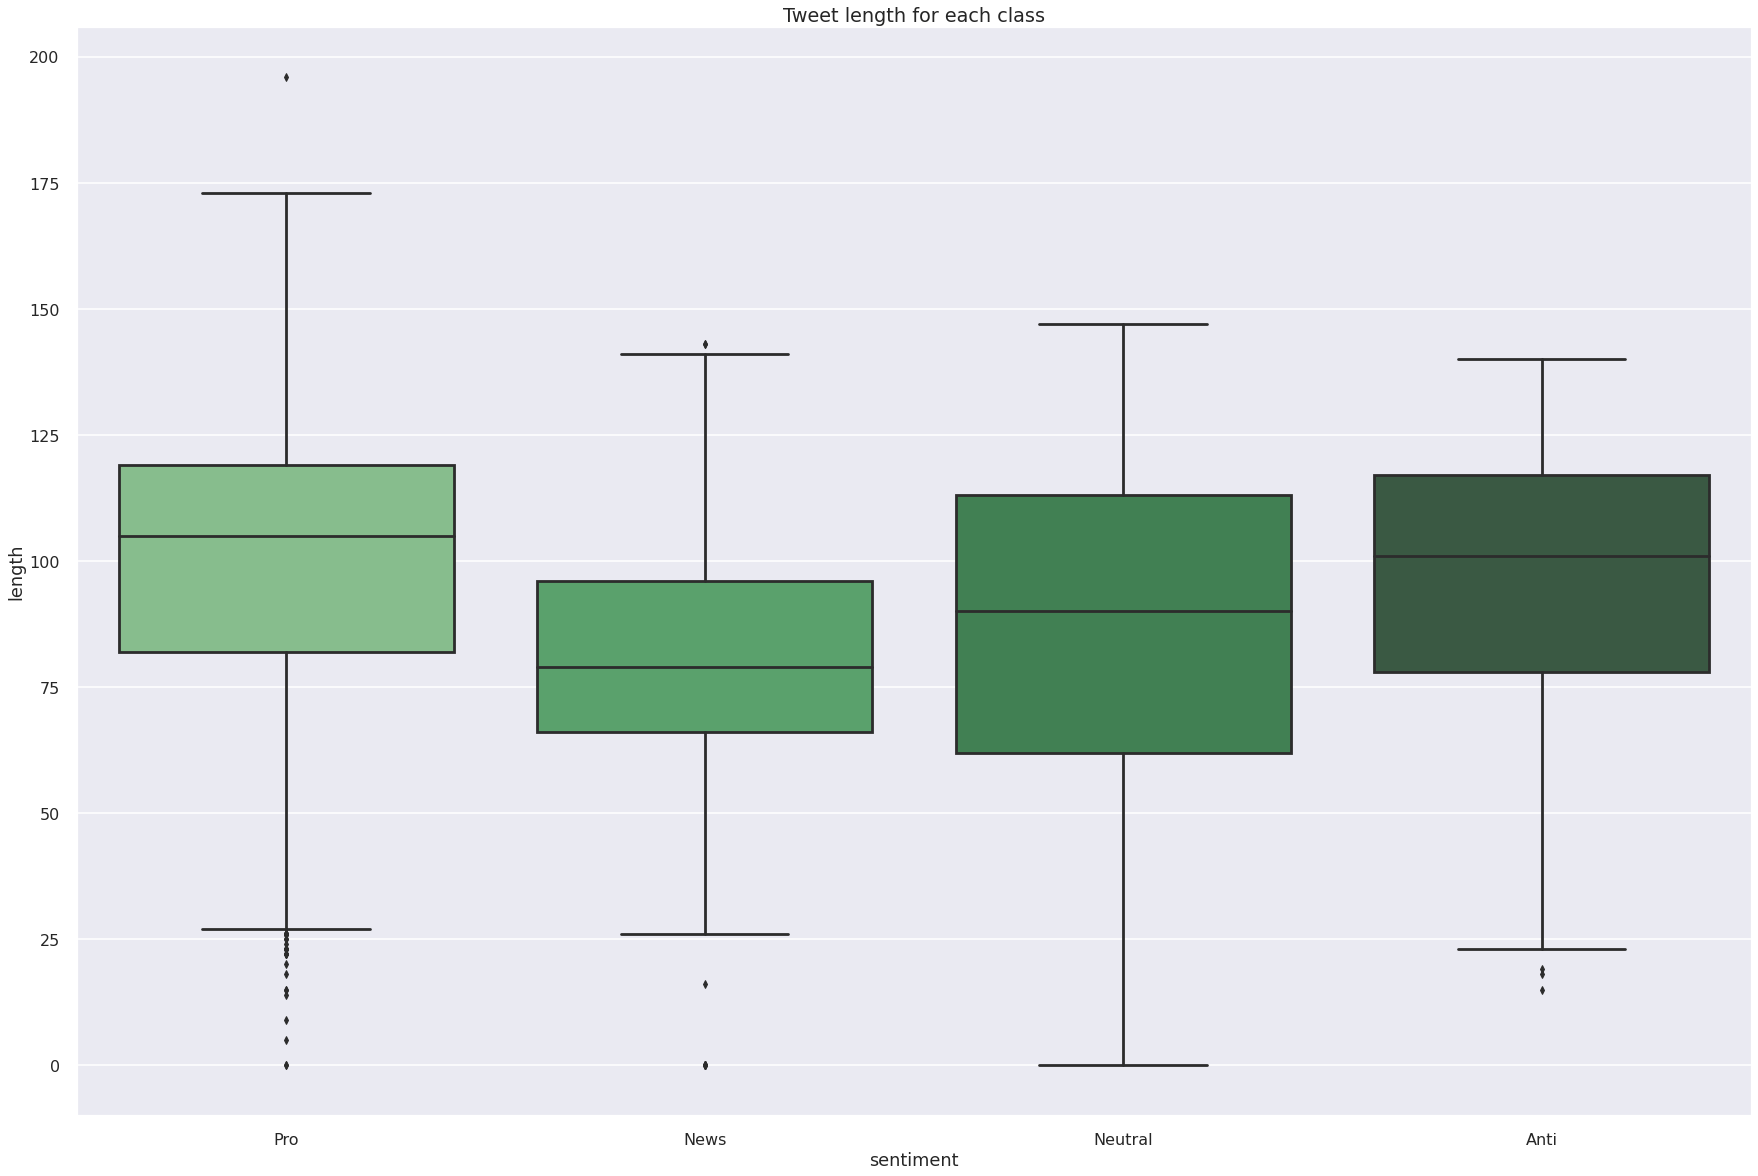

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(x=train['sentiment'], y=train['length'], data=train, palette=("Greens_d"))
plt.title('Tweet length for each class')
plt.show()

In [ ]:
def frequency(tweet):    
    cv = CountVectorizer(stop_words='english') #Count vectorizer excluding stopwords
    words = cv.fit_transform(tweet)

    sum_words = words.sum(axis=0) # Count the words in the tweets and determine the frequency of each word
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])# Create a dataframe to store the top 25 words and their frequencies
    frequency = frequency.head(25)    
    return frequency

In [ ]:
pro_freq=frequency(train['lemmatized'][train['sentiment']=='Pro'])
anti_freq=frequency(train['lemmatized'][train['sentiment']=='Anti'])
news_freq=frequency(train['lemmatized'][train['sentiment']=='News'])
neutral_freq=frequency(train['lemmatized'][train['sentiment']=='Neutral'])

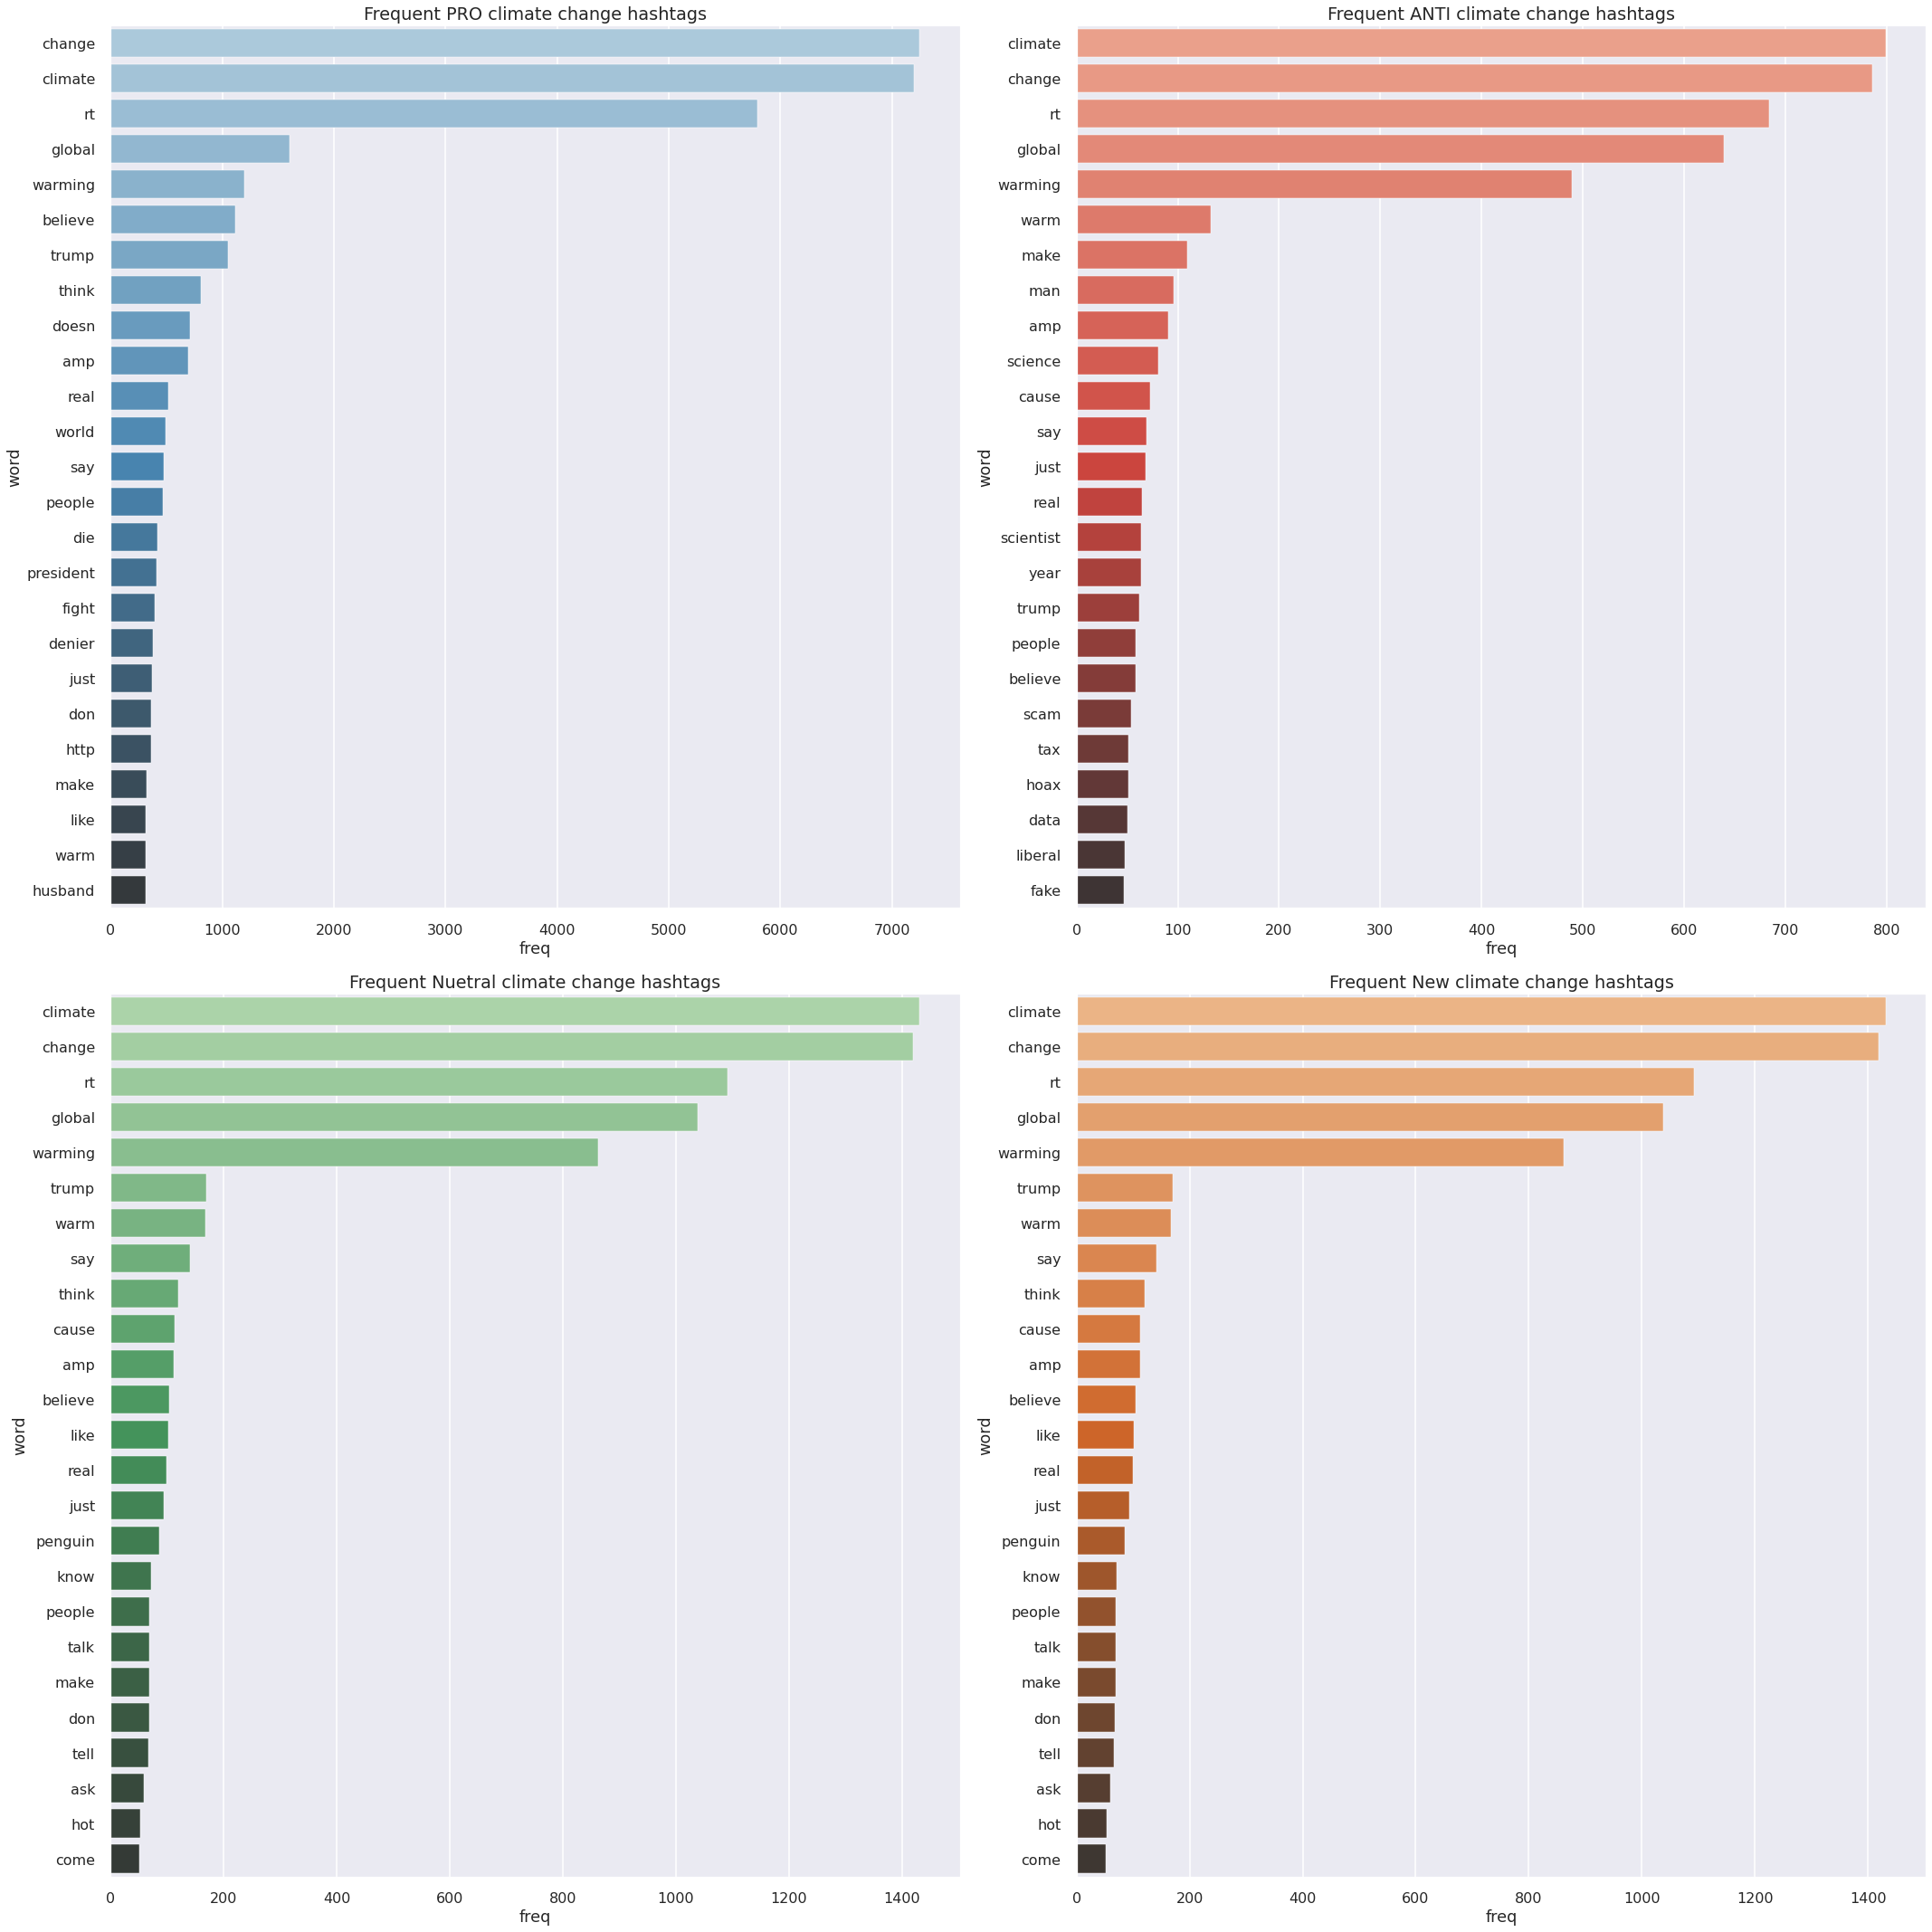

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
sns.barplot(data=pro_freq,y=pro_freq['word'], x=pro_freq['freq'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,2)
sns.barplot(data=anti_freq,y=anti_freq['word'], x=anti_freq['freq'], palette=("Reds_d"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,3)
sns.barplot(data=neutral_freq,y=neutral_freq['word'], x=neutral_freq['freq'], palette=("Greens_d"))
plt.title('Frequent Nuetral climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,4)
sns.barplot(data=neutral_freq,y=neutral_freq['word'], x=neutral_freq['freq'], palette=("Oranges_d"))
plt.title('Frequent New climate change hashtags')
plt.tight_layout()

In [ ]:
# Extract the words in the tweets for the pro and anti climate change classes 
pro_words = ' '.join([text for text in pro_freq['word']])
anti_words = ' '.join([text for text in anti_freq['word']])
news_words = ' '.join([text for text in news_freq['word']])
neutral_words = ' '.join([text for text in neutral_freq['word']])

In [ ]:
# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800,height=500, random_state=73,max_font_size=110,background_color='white',colormap="Greens").generate(pro_words)

# Create wordcloud for the anti climate change class
anti_wordcloud=WordCloud(width=800,height=500, random_state=110, max_font_size=110,background_color='white',colormap="Reds").generate(anti_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800,height=500,random_state=0,max_font_size=110,background_color='white',colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, height=500, random_state=10, max_font_size=110, background_color='white',colormap="Oranges").generate(neutral_words)

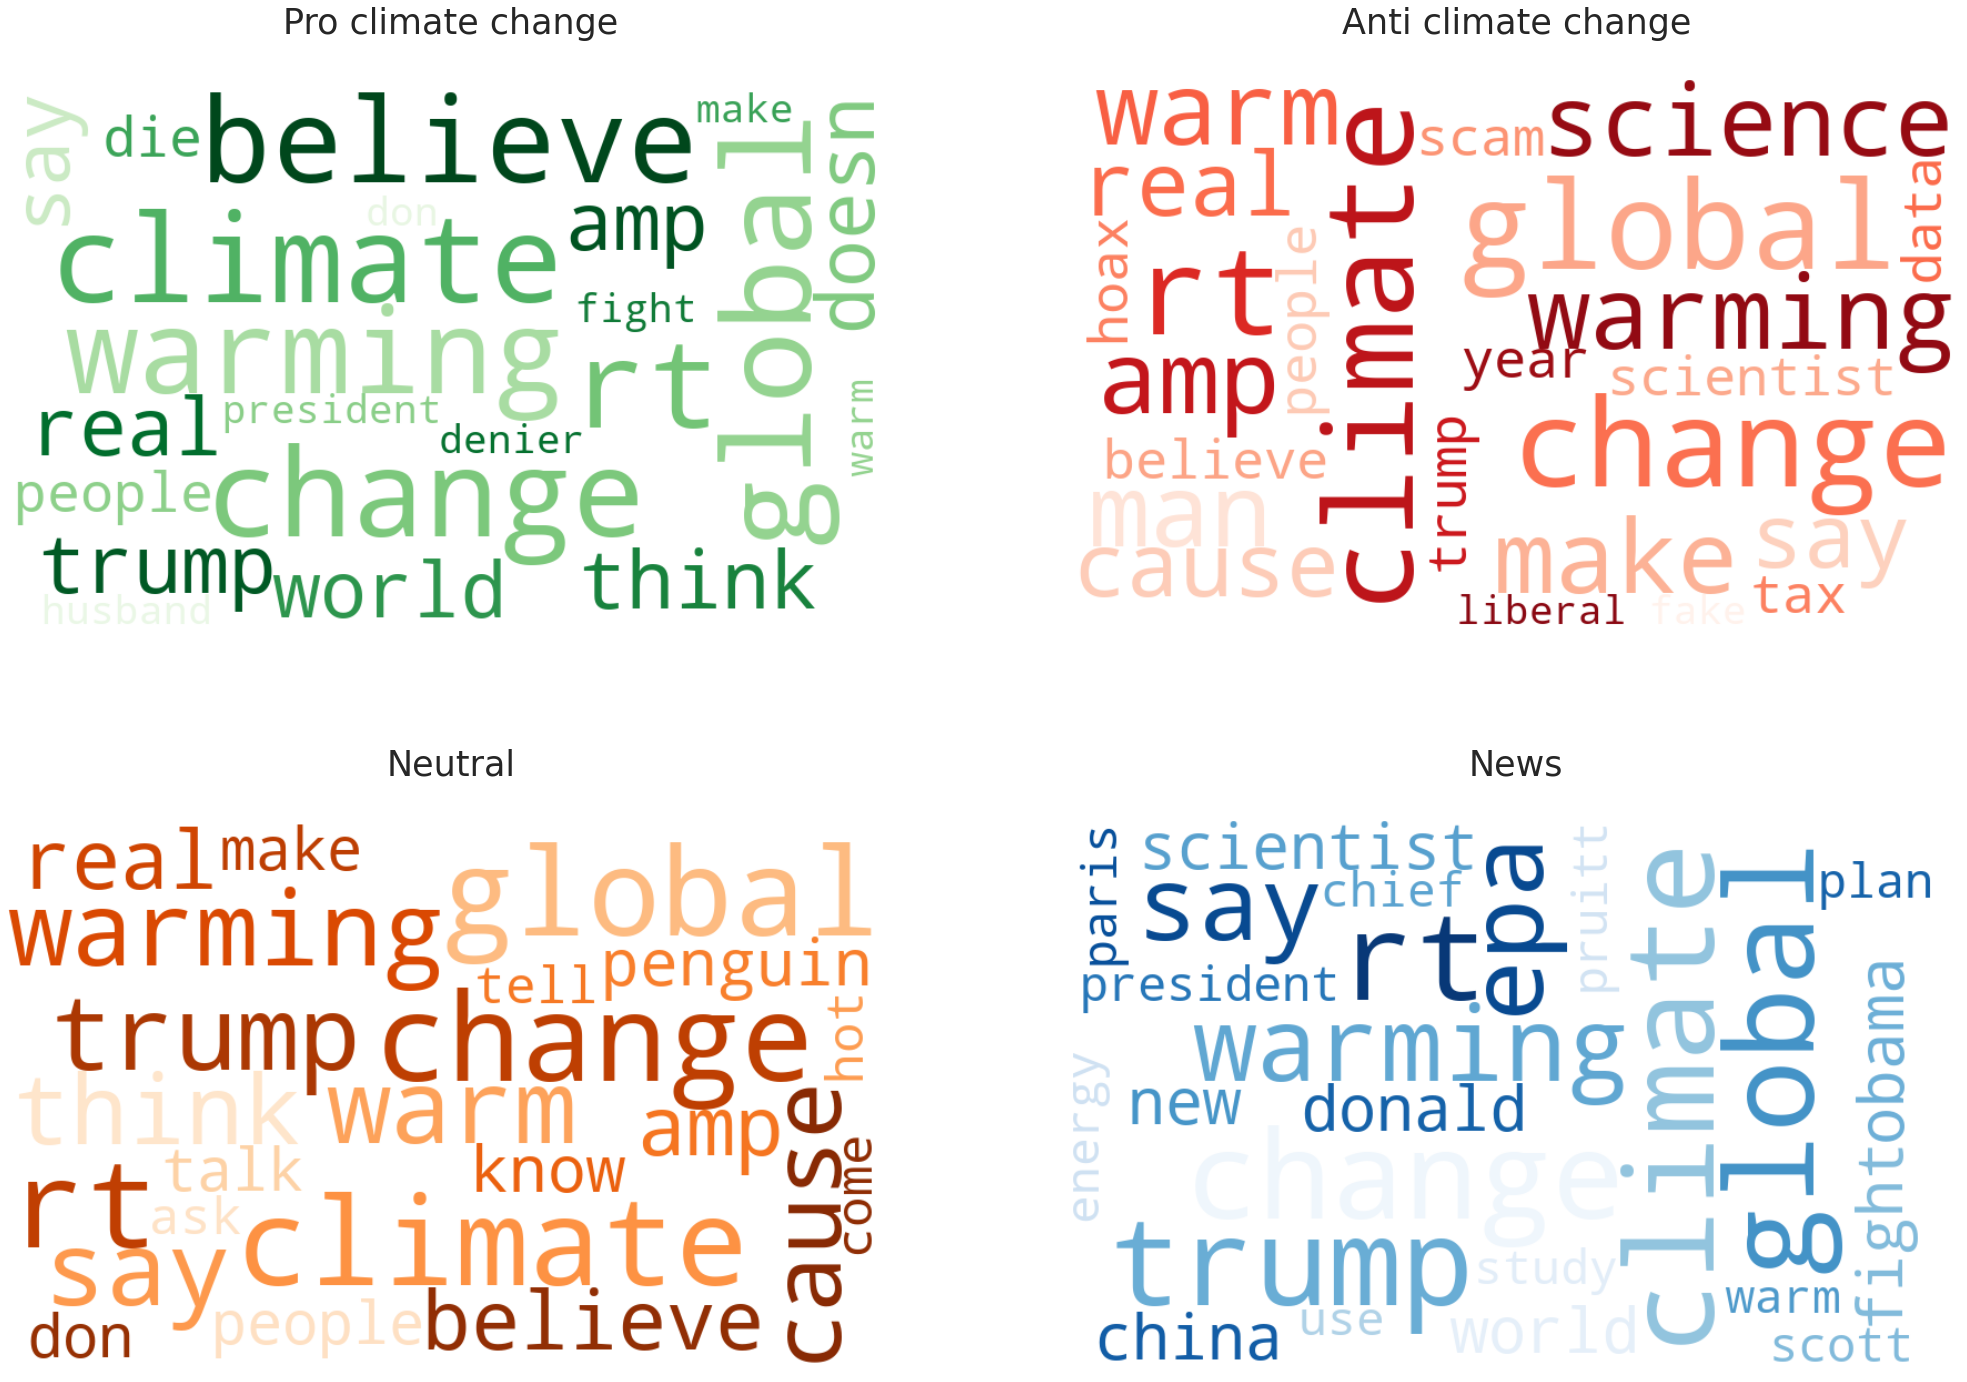

In [ ]:
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

## Model Training

In [ ]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

In [ ]:
style.use('seaborn-pastel')
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(20, 10),dpi=100)
sns.countplot(df['sentiment'], ax=axes[0])
axes[1].pie(df['sentiment'].value_counts(),labels='Pro', 'News', 'Neutral', 'Anti',autopct='%1.0f%%',shadow=True,startangle=90,explode = (0.1, 0.1, 0.1, 0.1))
fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

## Model's predictive accuracy assessment

## Conclusion